In [121]:
import pandas as pd
import numpy as np
import operator
import scipy.stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

#### Practice

In [122]:
from sklearn.metrics import mean_squared_error, r2_score  # mse, r2
from sklearn.preprocessing import PolynomialFeatures

In [123]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3, 3, 20)

In [124]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [125]:
x.shape

(20, 1)

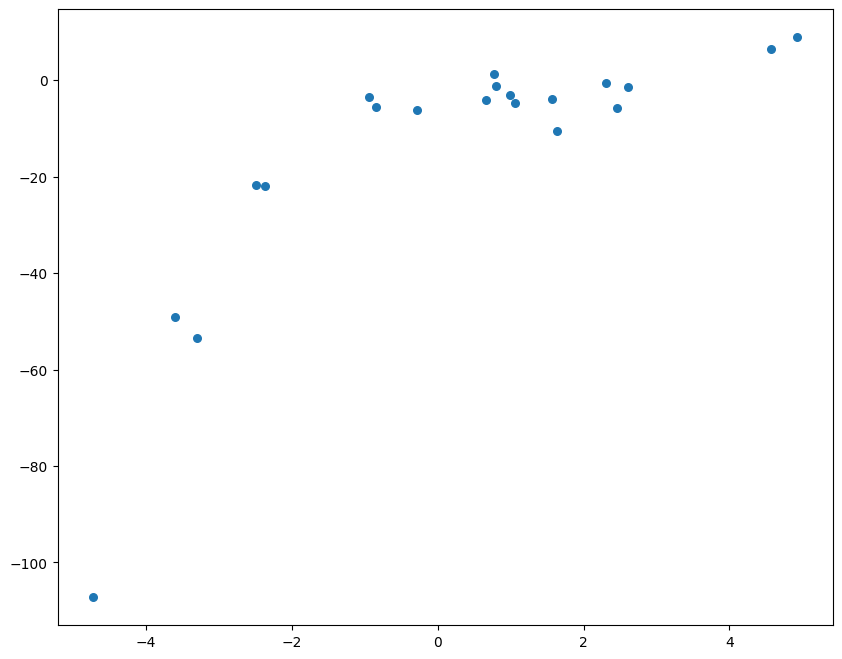

In [126]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=30)

In [127]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [128]:
model.coef_, model.intercept_

(array([[8.29238755]]), array([-16.79645067]))

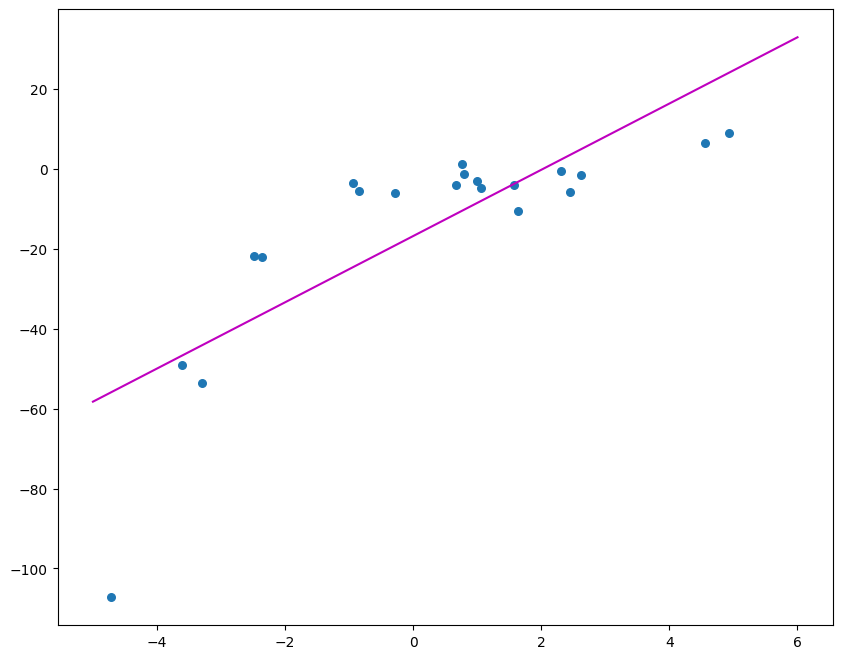

In [129]:
plt.figure(figsize=(10, 8))

line_x = np.arange(-5, 7)
line_y = np.squeeze(model.coef_ * line_x + model.intercept_)
plt.plot(line_x, line_y, color='m')
plt.scatter(x, y, s=30)

In [130]:
pred = model.predict(x)
pred

array([[-44.09629271],
       [-10.16645153],
       [-24.5598996 ],
       [-55.95874018],
       [-46.67121946],
       [ 24.10022521],
       [-23.84717967],
       [  3.55366232],
       [  2.35611659],
       [-10.42620129],
       [ -3.79507092],
       [-36.38987415],
       [-19.14413485],
       [ -3.23860475],
       [-11.25373341],
       [ -8.51254609],
       [-37.38012369],
       [  4.89207993],
       [ -7.99991171],
       [ 21.03580306]])

In [131]:
y0 = x[0] * model.coef_[0] + model.intercept_[0]
y0, pred[0]

(array([-44.09629271]), array([-44.09629271]))

In [132]:
y[0]

array([-53.46841187])

In [133]:
rmse = mean_squared_error(y, pred, squared=False)
r2 = r2_score(y, pred)
print('rmse: ', rmse)
print('r2: ', r2)

rmse:  15.908242501429998
r2:  0.6386750054827146


#### Polynomial regression

In [134]:
# sklearn generate addition features for polynomial regression
polynomial_features = PolynomialFeatures(degree=2)  # indicate degree(0, 1, 2) -> feature_1**0; feature_2**1; feature_3**2
x_poly = polynomial_features.fit_transform(x)

In [135]:
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

In [136]:
model = LinearRegression()
model.fit(x_poly, y)
pred = model.predict(x_poly)
print(pred)

[[-51.70395899]
 [ -0.3768314 ]
 [-15.49084857]
 [-82.51360898]
 [-57.82529579]
 [ -3.8842325 ]
 [-14.51152638]
 [  4.89510132]
 [  4.7901049 ]
 [ -0.56263917]
 [  3.18023781]
 [-35.26006027]
 [ -8.65246595]
 [  3.39960586]
 [ -1.17590986]
 [  0.73130614]
 [-37.21553918]
 [  4.93206451]
 [  1.04847428]
 [ -1.30607467]]


In [137]:
rmse = mean_squared_error(y, pred, squared=False)
r2 = r2_score(y, pred)
print('rmse: ', rmse)
print('r2: ', r2)

rmse:  10.120437473614711
r2:  0.8537647164420812


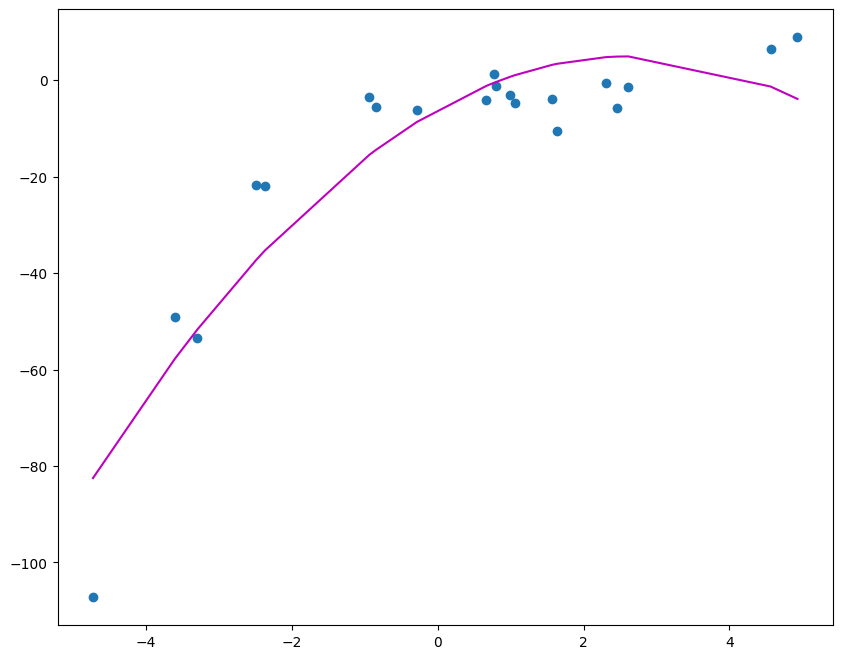

In [138]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(x, pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

In [139]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = mean_squared_error(y, y_poly_pred, squared=False)
r2 = r2_score(y, y_poly_pred)
print('rmse: ', rmse, '| r2: ', r2)

rmse:  3.449895507408725 | r2:  0.9830071790386679


In [140]:
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

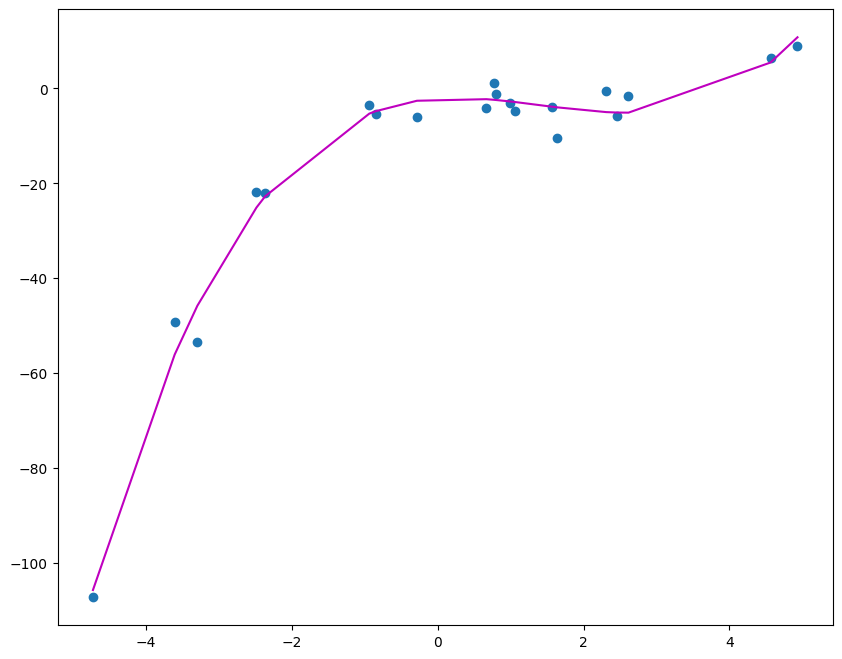

In [141]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

#### Logistic Regression

In [142]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [143]:
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=19
                           )
X

array([[ 0.94111613,  0.90354464],
       [-0.87876469,  0.69049739],
       [ 0.48628889, -1.20009558],
       [ 0.9741838 ,  1.37293162],
       [ 0.13166982,  1.36053924],
       [ 1.3175149 , -1.13712247],
       [-0.98695935,  1.13671295],
       [-1.4380817 , -1.44909964],
       [-1.21150543, -0.98211353],
       [ 1.6967232 , -0.67068973],
       [-2.19619506, -0.16802132],
       [-0.33191661,  2.51133013],
       [-1.39152682,  0.58132381],
       [ 1.62634658, -0.72160068],
       [-1.44778389,  0.6362001 ],
       [ 0.59543274, -0.57022956],
       [ 0.17305019,  1.5506415 ],
       [-1.032156  , -1.47096612],
       [-2.51658988, -0.47515337],
       [-0.03157871,  1.60621281],
       [-1.1463689 , -0.91895586],
       [ 0.251064  ,  1.8901038 ],
       [-1.41704655, -1.03377   ],
       [-0.81193877,  0.79954416],
       [ 0.33603119,  1.47143505],
       [-2.01295445, -0.04293602],
       [-0.67783746, -0.42125072],
       [ 1.45131981, -0.88631373],
       [-1.74766329,

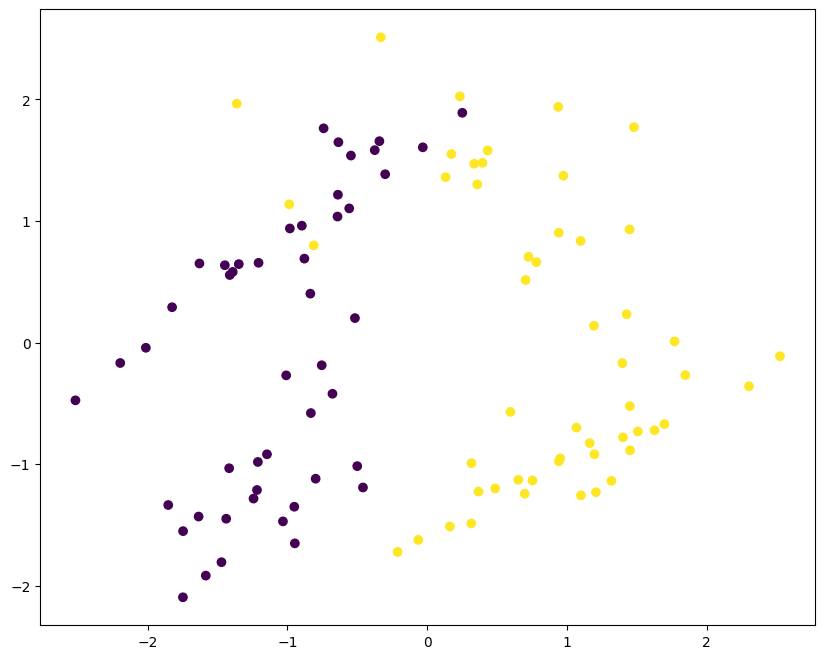

In [144]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [145]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [146]:
model.score(X, y)

0.94

In [147]:
model.predict(X)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [148]:
model.predict_proba(X)

array([[4.36681625e-02, 9.56331838e-01],
       [8.57122644e-01, 1.42877356e-01],
       [1.26083595e-01, 8.73916405e-01],
       [4.07175561e-02, 9.59282444e-01],
       [2.89393895e-01, 7.10606105e-01],
       [1.52886065e-02, 9.84711393e-01],
       [8.90608983e-01, 1.09391017e-01],
       [9.61628905e-01, 3.83710945e-02],
       [9.32689508e-01, 6.73104918e-02],
       [5.66624267e-03, 9.94333757e-01],
       [9.95029698e-01, 4.97030226e-03],
       [5.94995761e-01, 4.05004239e-01],
       [9.59471443e-01, 4.05285567e-02],
       [6.82485437e-03, 9.93175146e-01],
       [9.65015142e-01, 3.49848583e-02],
       [9.90415393e-02, 9.00958461e-01],
       [2.68343996e-01, 7.31656004e-01],
       [8.93874254e-01, 1.06125746e-01],
       [9.97869058e-01, 2.13094174e-03],
       [3.88913593e-01, 6.11086407e-01],
       [9.21000724e-01, 7.89992757e-02],
       [2.31282154e-01, 7.68717846e-01],
       [9.60027580e-01, 3.99724204e-02],
       [8.34223756e-01, 1.65776244e-01],
       [1.910512

In [149]:
model.coef_

array([[ 2.68436118, -0.03350121]])

In [150]:
model.intercept_

array([0.5904599])

In [155]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

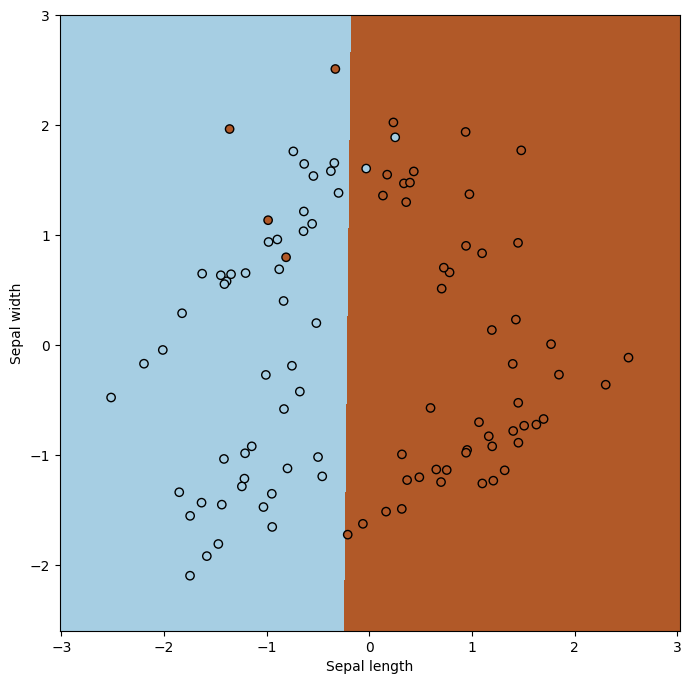

In [162]:
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

#### Polynomial regression

In [163]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LogisticRegression())

In [164]:
pipe.fit(X, y)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('logisticregression', LogisticRegression())])

In [165]:
pipe.predict(X)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [167]:
pipe.score(X, y)

0.96

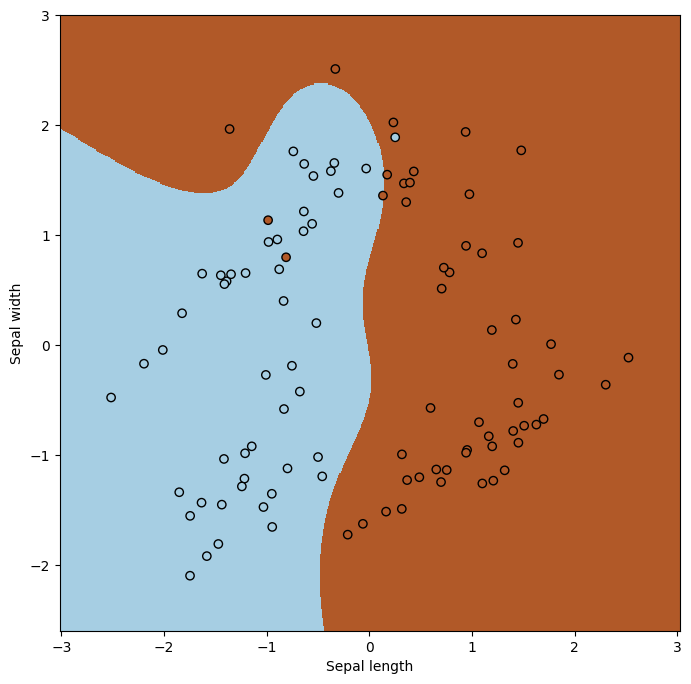

In [168]:
Z = pipe.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()